Step 1: First, let's import all the necessary libraries:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


Step 2: Loading the dataset!


In [3]:
ipl=pd.read_csv("ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


Step 3: Data Pre-processing


In [4]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [5]:
#Further Pre-Processing
X = df.drop(['total'], axis =1)
y = df['total']


In [6]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [7]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Feature Scaling


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4: Define the Neural Network


In [9]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


Step 5: Model Training


In [10]:
model.fit(X_train_scaled,y_train,epochs=50, batch_size=64, validation_data=(X_test_scaled,y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 55.7376 - val_loss: 22.2362
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4298 - val_loss: 21.9894
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2887 - val_loss: 22.6380
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1473 - val_loss: 21.9118
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2957 - val_loss: 22.6573
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2012 - val_loss: 21.8246
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2430 - val_loss: 22.6514
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1504 - val_loss: 22.0793
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1205 - val_loss: 21.8276
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2593 - val_loss: 22.0492
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1920 - val_loss: 22.3388
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

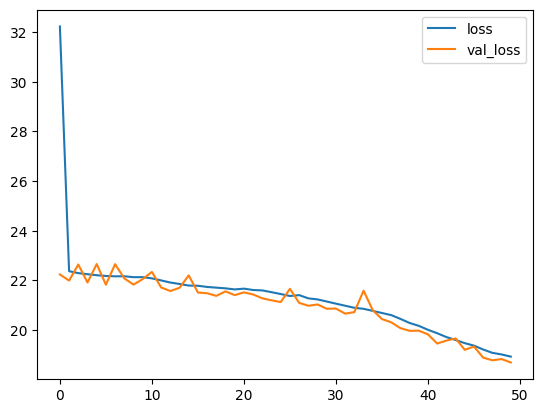

In [11]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


Step 6: Model Evaluation


In [12]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.179330825805664

Step 7: Let's create an Interactive Widget


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load IPL dataset
df = pd.read_csv("ipl_data.csv")

# Initialize encoders and fit on available data
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

venue_encoder.fit(df['venue'].unique())
batting_team_encoder.fit(df['bat_team'].unique())
bowling_team_encoder.fit(df['bowl_team'].unique())
batsman_encoder.fit(df['batsman'].unique())
bowler_encoder.fit(df['bowler'].unique())

# Widgets for selecting match details
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Venue:')
team1 = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Team 1:')
team2 = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Team 2:')
batting_first = widgets.RadioButtons(options=['Team 1', 'Team 2'], description='Batting First:')

# Function to select best playing XI based on player stats
def get_best_xi(team):
    team_players = df[df['bat_team'] == team].groupby('batsman').agg({'runs': 'sum'}).reset_index()
    if 'balls' in df.columns:
        team_players['balls'] = df[df['bat_team'] == team].groupby('batsman')['balls'].sum().values
        team_players['strike_rate'] = (team_players['runs'] / team_players['balls']) * 100
        team_players = team_players.sort_values(by=['runs', 'strike_rate'], ascending=[False, False])
    else:
        team_players = team_players.sort_values(by=['runs'], ascending=[False])
    best_xi = team_players['batsman'].head(7).tolist()

    if 'wickets' in df.columns and 'overs' in df.columns:
        bowlers = df[df['bowl_team'] == team].groupby('bowler').agg({'wickets': 'sum', 'overs': 'sum'}).reset_index()
        bowlers['economy'] = (bowlers['overs'] * 6) / (bowlers['wickets'] + 1)
        bowlers = bowlers.sort_values(by=['wickets', 'economy'], ascending=[False, True])
        best_xi += [bowler for bowler in bowlers['bowler'].tolist() if bowler not in best_xi][:4]

    return list(set(best_xi))  # Ensure uniqueness

# Update playing XI selection based on team selection
def update_players(*args):
    team1_xi.value = ', '.join(get_best_xi(team1.value))
    team2_xi.value = ', '.join(get_best_xi(team2.value))

team1.observe(update_players, names='value')
team2.observe(update_players, names='value')

# Display best playing XI
team1_xi = widgets.Textarea(value="", description='Team 1 XI', layout={'height': '100px'})
team2_xi = widgets.Textarea(value="", description='Team 2 XI', layout={'height': '100px'})

# Prediction button and output area
predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

def safe_encode(encoder, value):
    return encoder.transform([value])[0] if value in encoder.classes_ else -1

def predict_score(b):
    with output:
        clear_output()

        selected_venue = venue.value
        selected_team1 = team1.value
        selected_team2 = team2.value
        first_batting_team = selected_team1 if batting_first.value == 'Team 1' else selected_team2
        first_bowling_team = selected_team2 if batting_first.value == 'Team 1' else selected_team1

        encoded_venue = safe_encode(venue_encoder, selected_venue)
        encoded_bat_team = safe_encode(batting_team_encoder, first_batting_team)
        encoded_bowl_team = safe_encode(bowling_team_encoder, first_bowling_team)

        first_batsman = get_best_xi(first_batting_team)[0]
        first_bowler = get_best_xi(first_bowling_team)[0]

        encoded_batsman = safe_encode(batsman_encoder, first_batsman)
        encoded_bowler = safe_encode(bowler_encoder, first_bowler)

        input_data = pd.DataFrame([[encoded_venue, encoded_bat_team, encoded_bowl_team, encoded_batsman, encoded_bowler]],
                                  columns=['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'])

        input_data = scaler.transform(input_data)

        predicted_score = model.predict(input_data)
        predicted_score = int(predicted_score[0, 0])

        print(f"Predicted score for {first_batting_team}: {predicted_score}")

predict_button.on_click(predict_score)

display(venue, team1, team2, batting_first, team1_xi, team2_xi, predict_button, output)


Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Team 1:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', '…

Dropdown(description='Team 2:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', '…

RadioButtons(description='Batting First:', options=('Team 1', 'Team 2'), value='Team 1')

Textarea(value='', description='Team 1 XI', layout=Layout(height='100px'))

Textarea(value='', description='Team 2 XI', layout=Layout(height='100px'))

Button(description='Predict Score', style=ButtonStyle())

Output()